In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
def make_blurred_dataset(X, blurring_ratio = 0.8, min_intensity = 0, max_intensity = 1):
    assert (blurring_ratio<=0.95)
    shape_of_dataset = X.shape
    random_matrix = np.random.rand(*shape_of_dataset)

    coef_matrix = 1*(random_matrix<=blurring_ratio)

    intensity_matrix = np.random.uniform(low=min_intensity, high=max_intensity, size=shape_of_dataset)
    intensity = (1-intensity_matrix)
    mult = coef_matrix*intensity
    substraction = X * mult
    
    X_blurred = X - substraction
    return X_blurred

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28)
# path = './tmp/mnist.npz'
# # the data, split between train and test sets

# with np.load(path, allow_pickle=True) as f:
#     x_train, y_train = f['x_train'], f['y_train']
#     x_test, y_test = f['x_test'], f['y_test']

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train_blurred = make_blurred_dataset(x_train)
x_test_blurred = make_blurred_dataset(x_test)

# Scale images to the [0, 1] range
# x_train = x_train.astype("float32") / 255
# x_test = x_test.astype("float32") / 255
x_train_unnormalized = x_train
x_test_unnormalized = x_test


x_train = keras.utils.normalize(x_train, axis = 1)
x_test = keras.utils.normalize(x_test, axis = 1)


print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print("y_train shape:", y_train.shape)
print(y_train[0])

y_train_unencoded = y_train
y_test_unencoded = y_test
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
y_train shape: (60000,)
5


In [4]:
import keras.backend as K

# defining a new metric that will be displayed during the fitting
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [9]:
# Loading the models

mlp_model = keras.models.load_model("./models/mlp_mnist", custom_objects={"f1_metric":f1_metric})
cnn_model = keras.models.load_model("./models/cnn_mnist", custom_objects={"f1_metric":f1_metric})

In [10]:
batch_size = 128
epochs = 15

# compiling the model we previously defined
mlp_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", f1_metric])

# training the model
history_raw = mlp_model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 2s 2ms/step - loss: 0.0032 - accuracy: 0.9990 - f1_metric: 0.9990 - val_loss: 0.1671 - val_accuracy: 0.9773 - val_f1_metric: 0.9773
Epoch 2/5
422/422 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9985 - f1_metric: 0.9984 - val_loss: 0.1693 - val_accuracy: 0.9768 - val_f1_metric: 0.9771
Epoch 3/5
422/422 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9981 - f1_metric: 0.9981 - val_loss: 0.1742 - val_accuracy: 0.9750 - val_f1_metric: 0.9752
Epoch 4/5
422/422 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9994 - f1_metric: 0.9994 - val_loss: 0.1607 - val_accuracy: 0.9785 - val_f1_metric: 0.9785
Epoch 5/5
422/422 [==============================] - 1s 2ms/step - loss: 3.0158e-04 - accuracy: 1.0000 - f1_metric: 1.0000 - val_loss: 0.1646 - val_accuracy: 0.9783 - val_f1_metric: 0.9783


In [11]:
batch_size = 128
epochs = 15

# compiling the model we previously defined
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", f1_metric])

# training the model
history_adam = cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 17s 40ms/step - loss: 0.0757 - accuracy: 0.9769 - f1_metric: 0.9769 - val_loss: 0.0459 - val_accuracy: 0.9865 - val_f1_metric: 0.9866
Epoch 2/5
422/422 [==============================] - 15s 36ms/step - loss: 0.0669 - accuracy: 0.9801 - f1_metric: 0.9801 - val_loss: 0.0433 - val_accuracy: 0.9882 - val_f1_metric: 0.9880
Epoch 3/5
422/422 [==============================] - 16s 39ms/step - loss: 0.0634 - accuracy: 0.9801 - f1_metric: 0.9803 - val_loss: 0.0410 - val_accuracy: 0.9883 - val_f1_metric: 0.9887
Epoch 4/5
422/422 [==============================] - 14s 34ms/step - loss: 0.0586 - accuracy: 0.9814 - f1_metric: 0.9815 - val_loss: 0.0390 - val_accuracy: 0.9890 - val_f1_metric: 0.9901
Epoch 5/5
422/422 [==============================] - 15s 35ms/step - loss: 0.0551 - accuracy: 0.9828 - f1_metric: 0.9826 - val_loss: 0.0387 - val_accuracy: 0.9892 - val_f1_metric: 0.9889


In [12]:
# Evaluating the models on the training and test dataset

print("Evaluation of the MLP model:")
print("Training set:")
mlp_model.evaluate(x_train, y_train)
print("Test set:")
mlp_model.evaluate(x_test, y_test)

print("\nEvaluation of the CNN model:")
print("Training set:")
cnn_model.evaluate(x_train, y_train)
print("Test set:")
cnn_model.evaluate(x_test, y_test)

Evaluation of the MLP model:
Training set:
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0168 - accuracy: 0.9977 - f1_metric: 0.9977
Test set:
313/313 [==============================] - 0s 925us/step - loss: 0.1726 - accuracy: 0.9740 - f1_metric: 0.9742

Evaluation of the CNN model:
Training set:
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0307 - accuracy: 0.9906 - f1_metric: 0.9905
Test set:
313/313 [==============================] - 1s 3ms/step - loss: 0.0362 - accuracy: 0.9884 - f1_metric: 0.9887


[0.036184776574373245, 0.9883999824523926, 0.9886862635612488]

(-0.5, 27.5, 27.5, -0.5)

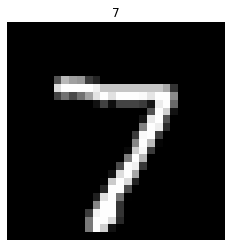

In [27]:
np.random.seed(2)
first_img = x_test_unnormalized[0]

img = np.array(first_img, dtype='float')
plt.title(y_test_unencoded[0])
pixels = img.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.axis("off")
# print(first_image)

(28, 28)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0.99619283 0.9939959  0.99756818 0.99880119 0.99741468 0.99553763
 0.99655436 0.99298023 0.99617472 0.99495138 0.99709144 0.99910974
 0.99283205 0.9977589  0.99534559 0.99406044 0.99327378 0.99585257
 0.997209   0.99107222 0.99355726 0.99751972 0.99231906 0.99463191
 0.99580231 0.99902609 0.99777839 0.99894576]


(-0.5, 27.5, 27.5, -0.5)

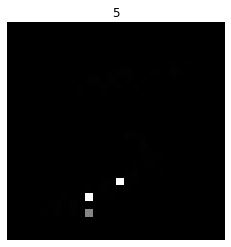

In [14]:
first_img = x_train_unnormalized[0]
# ratio of pixels that will get blurred
blurring_ratio = 0.98

# pixels that will be affected will see their value be multiplied by a number from [0.3, 1]
min_intensity = 0
max_intensity = 0.01

print(first_img.shape)
# get a matrix with values between 0 and 1 from the uniform distribution
random_matrix = np.random.rand(28,28)
# get a matrix of 0s and 1s, 0 meaning the value obtaining was higher that 0.2 and 1 lower
# which means we have around 20% of 1s and 80% of 0s
coef_matrix = 1*(random_matrix<=blurring_ratio)
print(coef_matrix[0])
# print(coef_matrix)

intensity_matrix = np.random.uniform(low=min_intensity, high=max_intensity, size=(28,28))
print(1-intensity_matrix[0])

intensity = (1-intensity_matrix)
mult = coef_matrix*intensity
substraction = first_img*mult
# the new image becomes the values of the images, to which we substract the value of the pixels multipled by 0 or 1(depending if the pixel has to be blurred) multiplied by an intensity
test_img = first_img - substraction

plt.title(y_train_unencoded[0])
plt.imshow(test_img, cmap='gray')
plt.axis("off")

9 raw numbers


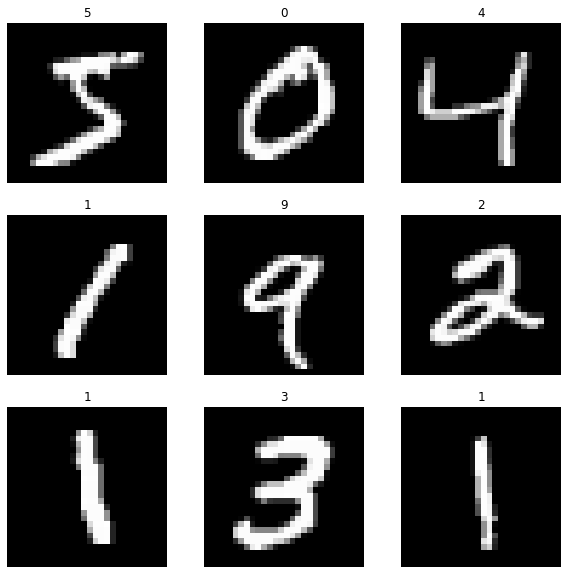

In [5]:
labels = y_train_unencoded
images_raw = x_train_unnormalized
images = x_train

print("9 raw numbers")
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = images_raw[i]
    img = np.array(img, dtype='float')
    plt.title(labels[i])
    pixels = img.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.axis("off")

Same 9 numbers after normalization


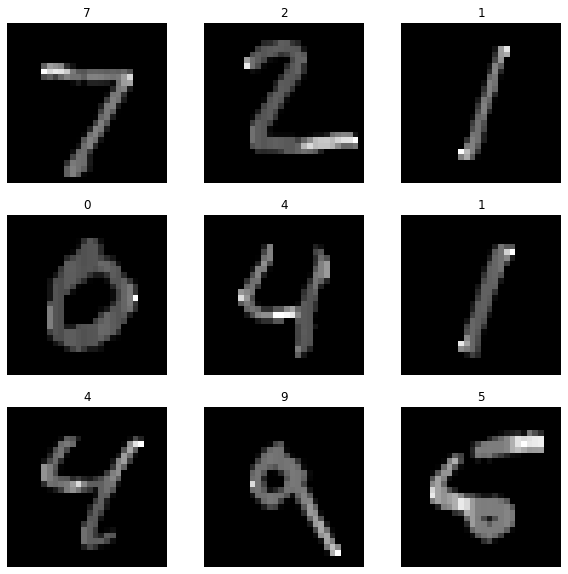

In [27]:
print("Same 9 numbers after normalization")
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    first_image = x_test[i]
    first_image = np.array(first_image, dtype='float')
    plt.title(y_test_unencoded[i])
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

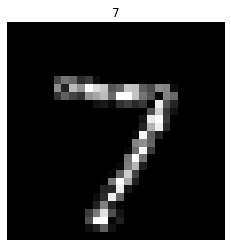

In [14]:
X = x_test_unnormalized
# blurring_ratio=0.3, min_intensity=0, max_intensity=0.2 --> 
# At most 30% of the pixels will have their value changed
# A manipulated pixel will at most have 100% of its value deleted (1-min_intesity)
# A manipulated pixel will at least have 80% of its value deleted (1-max_intensity) 
X_blurred = make_blurred_dataset(X, blurring_ratio=0.8, min_intensity=0, max_intensity=1)

plt.title(y_test_unencoded[0])
plt.imshow(X_blurred[0], cmap='gray')
plt.axis("off")

Results obtained after modifying 80% of the pixels by substracting between 
 99 and 100 percent of their values (255 becomes a value in [0, 2.55])


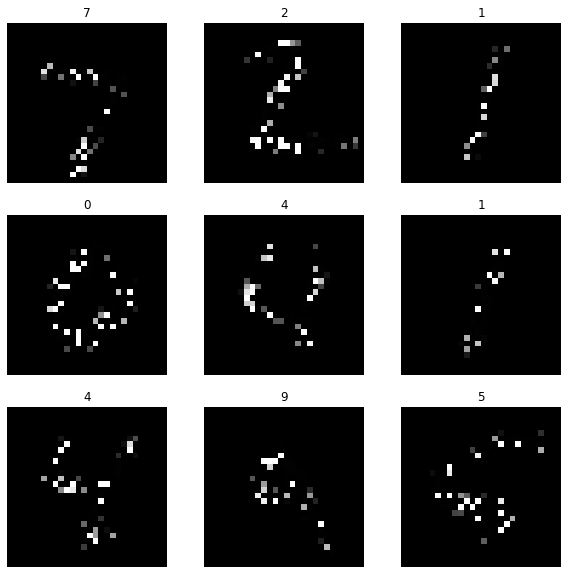

In [42]:
labels = y_test_unencoded
# print("Same 9 numbers after normalization and slightly changing the values")
# print("Results obtained after modifying 90% of the pixels by substracting between \n 99 and 100 percent of their values (255 becomes a value in [0, 2.55])")
print("Results obtained after modifying 80% of the pixels by substracting between \n 99 and 100 percent of their values (255 becomes a value in [0, 2.55])")
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    first_image = X_blurred[i]
    first_image = np.array(first_image, dtype='float')
    plt.title(labels[i])
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.axis("off")

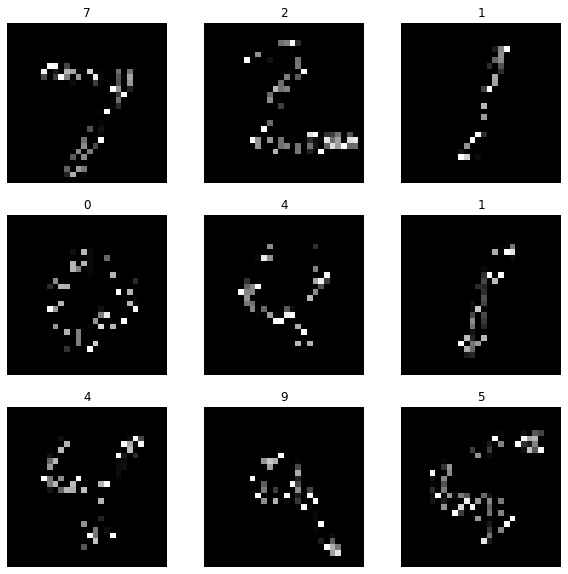

In [43]:
X_blurred_norm = keras.utils.normalize(X_blurred, axis = 1)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    first_image = X_blurred_norm[i]
    first_image = np.array(first_image, dtype='float')
    plt.title(labels[i])
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.axis("off")

In [45]:
print("Evaluation on the CNN model:")
print("Blurred set:")
cnn_model.evaluate(X_blurred, y_test)
print("Blurred then Normalized set:")
cnn_model.evaluate(keras.utils.normalize(X_blurred, axis = 1), y_test)

print("\nEvaluation on the MLP model:")
print("Blurred set:")
mlp_model.evaluate(X_blurred, y_test)
print("Blurred then Normalized set:")
mlp_model.evaluate(keras.utils.normalize(X_blurred, axis = 1), y_test)
score = mlp_model.evaluate(keras.utils.normalize(X_blurred, axis = 1), y_test)
print(score)


Evaluation on the CNN model:
Blurred set:
313/313 [==============================] - 1s 3ms/step - loss: 694.9739 - accuracy: 0.3344 - f1_metric: 0.3344
Blurred then Normalized set:
313/313 [==============================] - 1s 3ms/step - loss: 1.7139 - accuracy: 0.5087 - f1_metric: 0.5024

Evaluation on the MLP model:
Blurred set:
313/313 [==============================] - 0s 1ms/step - loss: 989.4451 - accuracy: 0.5457 - f1_metric: 0.5459
Blurred then Normalized set:
313/313 [==============================] - 0s 1ms/step - loss: 2.1483 - accuracy: 0.7000 - f1_metric: 0.7022
[2.1482527256011963, 0.699999988079071, 0.702197253704071]


In [21]:
# re train the models a bit for 5 epochs each

# make a figure for the accuracies (all on the test set), that will contain
# Accuracy with CNN on blurred set and blurred+norm set
# Accuracy with MLP on blurred set and blurred+norm set

# make a figure for the losses on blurred set of CNN and MLP
# make a figure for the losses on blurred+norm set of CNN and MLP

In [46]:
def get_score(X, Y):
    accuracies_CNN_raw = []
    accuracies_MLP_raw = []
    accuracies_CNN_norm = []
    accuracies_MLP_norm = []

    losses_CNN_raw = []
    losses_MLP_raw = []
    losses_CNN_norm = []
    losses_MLP_norm = []
    for i in range(0,9):
        X_blurred = make_blurred_dataset(X, blurring_ratio=i/10, min_intensity=0, max_intensity=1)
        score_CNN = cnn_model.evaluate(X_blurred, y_test)
        score_CNN_norm = cnn_model.evaluate(keras.utils.normalize(X_blurred, axis = 1), y_test)
        score_MLP = mlp_model.evaluate(X_blurred, y_test)
        score_MLP_norm = mlp_model.evaluate(keras.utils.normalize(X_blurred, axis = 1), y_test)
        accuracies_CNN_raw.append(score_CNN[1])
        accuracies_CNN_norm.append(score_CNN_norm[1])
        accuracies_MLP_raw.append(score_MLP[1])
        accuracies_MLP_norm.append(score_MLP_norm[1])

    return accuracies_CNN_raw, accuracies_CNN_norm, accuracies_MLP_raw, accuracies_MLP_norm
    

In [49]:
accuracies_CNN_raw, accuracies_CNN_norm, accuracies_MLP_raw, accuracies_MLP_norm = get_score(x_test_unnormalized, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2515 - accuracy: 0.9630 - f1_metric: 0.9631


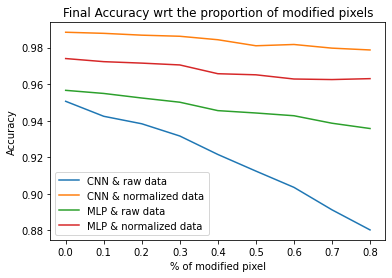

In [50]:
percentages = [i/10 for i in range(0,9)]

# print("Figure showing the accuracy of different models after modifying 80% of the pixels \nby substracting between 99 and 100 percent of their values (a 255 becomes a value in [0, 2.55])\n")
# print("As we can see, when we normalize the data after blurring it, we get much better results \nthan with raw data. We can also see that the models are doing a really good job finding")
# print("which number is in the picture even with such intense changes whereas us humans could probably not \nfind with a 70% accuracy which number is in the picture (see the numbers_for_figure_1.png)")
# print("We can also notice that both accuracies of the MLP model are better than the ones of the CNN, \nwhich could be explained by the fact that there has been so many changes to the images that we can't \nclearly spot edges anymore, which makes the CNN's filters less useful, hence the better performance \ncoming from the MLP model in this specific case.")
# print("Figure showing the accuracy of different models after modifying 80% of the pixels \nby randomly substracting between 0 and 100 percent of their values (a 255 becomes a value in [0, 255])\n")
# print("In this case, we can see the CNN architecture shines much more as as we can see on the numbers_for_figure2.png file, \nedges are still clear, which lets us profit of the complexity of convolutional neural networks for such tasks.")
fig1, ax1 = plt.subplots()
plt.title("Final Accuracy wrt the proportion of modified pixels")
plt.ylabel("Accuracy")
plt.xlabel("% of modified pixel")
ax1.set_xticks(percentages)
plt.plot(percentages, accuracies_CNN_raw)
plt.plot(percentages, accuracies_CNN_norm)
plt.plot(percentages, accuracies_MLP_raw)
plt.plot(percentages, accuracies_MLP_norm)
plt.legend(["CNN & raw data", "CNN & normalized data", "MLP & raw data", "MLP & normalized data"], loc = "lower left")
plt.show()

Figure showing the accuracy of different models after modifying 80% of the pixels 
by substracting between 99 and 100 percent of their values (a 255 becomes a value in [0, 2.55])

As we can see, when we normalize the data after blurring it, we get much better results 
than with raw data. We can also see that the models are doing a really good job finding
which number is in the picture even with such intense changes whereas us humans could probably not 
find with a 70% accuracy which number is in the picture (see the numbers_for_figure_1.png)
We can also notice that both accuracies of the MLP model are better than the ones of the CNN, 
which could be explained by the fact that there has been so many changes to the images that we can't 
clearly spot edges anymore, which makes the CNN's filters less useful, hence the better performance 
coming from the MLP model in this specific case.


In [25]:
mlp_model.evaluate(x_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0168 - accuracy: 0.9977 - f1_metric: 0.9977


[0.01679454743862152, 0.9977499842643738, 0.9977495074272156]

In [5]:
# Create model that will train itself on blurred images

model_blurred = keras.Sequential()

model_blurred.add(layers.Flatten(input_shape=input_shape))

model_blurred.add(layers.Dense(units = 100, activation = "relu"))

model_blurred.add(layers.Dense(units = 100, activation = "relu"))

model_blurred.add(layers.Dense(units = 10, activation = "softmax"))

model_blurred.build(input_shape)
model_blurred.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


2022-07-11 09:50:35.133753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
batch_size = 128
epochs = 30

# compiling the model we previously defined
model_blurred.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", f1_metric])


# training the model
history_mlp_blurred = model_blurred.fit(x_train_blurred, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 2s 2ms/step - loss: 2.8829 - accuracy: 0.7587 - f1_metric: 0.7602 - val_loss: 0.7134 - val_accuracy: 0.8588 - val_f1_metric: 0.8615
Epoch 2/30
422/422 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.8772 - f1_metric: 0.8794 - val_loss: 0.4420 - val_accuracy: 0.9037 - val_f1_metric: 0.9048
Epoch 3/30
422/422 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.9146 - f1_metric: 0.9161 - val_loss: 0.3742 - val_accuracy: 0.9177 - val_f1_metric: 0.9200
Epoch 4/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2294 - accuracy: 0.9355 - f1_metric: 0.9369 - val_loss: 0.3293 - val_accuracy: 0.9248 - val_f1_metric: 0.9268
Epoch 5/30
422/422 [==============================] - 1s 2ms/step - loss: 0.1739 - accuracy: 0.9492 - f1_metric: 0.9502 - val_loss: 0.3187 - val_accuracy: 0.9297 - val_f1_metric: 0.9306
Epoch 6/30
422/422 [==============================] - 1s 2ms/step - lo

In [16]:
# Create model that will train itself on blurred images

model_raw = keras.Sequential()

model_raw.add(layers.Flatten(input_shape=input_shape))

model_raw.add(layers.Dense(units = 100, activation = "relu"))

model_raw.add(layers.Dense(units = 100, activation = "relu"))

model_raw.add(layers.Dense(units = 10, activation = "softmax"))

model_raw.build(input_shape)
# model_blurred.summary()

batch_size = 128
epochs = 30

# compiling the model we previously defined
model_raw.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", f1_metric])


# training the model
history_mlp_raw = model_raw.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 2s 3ms/step - loss: 0.4321 - accuracy: 0.8828 - f1_metric: 0.8435 - val_loss: 0.1779 - val_accuracy: 0.9507 - val_f1_metric: 0.9510
Epoch 2/30
422/422 [==============================] - 1s 2ms/step - loss: 0.1798 - accuracy: 0.9472 - f1_metric: 0.9476 - val_loss: 0.1367 - val_accuracy: 0.9605 - val_f1_metric: 0.9602
Epoch 3/30
422/422 [==============================] - 1s 2ms/step - loss: 0.1261 - accuracy: 0.9624 - f1_metric: 0.9628 - val_loss: 0.1068 - val_accuracy: 0.9685 - val_f1_metric: 0.9698
Epoch 4/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9702 - f1_metric: 0.9709 - val_loss: 0.1010 - val_accuracy: 0.9702 - val_f1_metric: 0.9709
Epoch 5/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9766 - f1_metric: 0.9769 - val_loss: 0.0886 - val_accuracy: 0.9740 - val_f1_metric: 0.9749
Epoch 6/30
422/422 [==============================] - 1s 2ms/step - lo

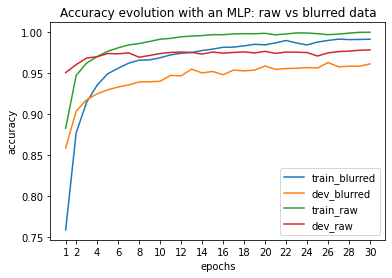

In [25]:
# Plotting the evolution of the accuracy, F1 score and loss of the model on the training and dev set throughout the training
epochs = [i for i in range(1,31)]
epochs_ticks = [i for i in range(1,31) if i%2==0 or i==1]# Accuracy
fig1, ax1 = plt.subplots()
ax1.set_xticks(epochs_ticks)
plt.plot(epochs, history_mlp_blurred.history["accuracy"])
plt.plot(epochs, history_mlp_blurred.history["val_accuracy"])
plt.plot(epochs, history_mlp_raw.history["accuracy"])
plt.plot(epochs, history_mlp_raw.history["val_accuracy"])
plt.title("Accuracy evolution with an MLP: raw vs blurred data")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train_blurred", "dev_blurred", "train_raw", "dev_raw"], loc = "lower right")
plt.show()


In [21]:
cnn_model_blurred = keras.Sequential()

cnn_model_blurred.add(keras.Input(shape=(28, 28, 1)))
cnn_model_blurred.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
cnn_model_blurred.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_blurred.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn_model_blurred.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_blurred.add(layers.Flatten())
cnn_model_blurred.add(layers.Dropout(0.5))
cnn_model_blurred.add(layers.Dense(num_classes, activation="softmax"))

cnn_model_blurred.build(input_shape)
cnn_model_blurred.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [22]:
batch_size = 128
epochs = 10

# compiling the model we previously defined
cnn_model_blurred.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", f1_metric])


# training the model
history_cnn_blurred = cnn_model_blurred.fit(x_train_blurred, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 14s 32ms/step - loss: 1.2924 - accuracy: 0.8013 - f1_metric: 0.8023 - val_loss: 0.1405 - val_accuracy: 0.9550 - val_f1_metric: 0.9562
Epoch 2/10
422/422 [==============================] - 15s 36ms/step - loss: 0.2457 - accuracy: 0.9248 - f1_metric: 0.9261 - val_loss: 0.0943 - val_accuracy: 0.9727 - val_f1_metric: 0.9735
Epoch 3/10
422/422 [==============================] - 15s 34ms/step - loss: 0.1830 - accuracy: 0.9436 - f1_metric: 0.9448 - val_loss: 0.0803 - val_accuracy: 0.9767 - val_f1_metric: 0.9764
Epoch 4/10
422/422 [==============================] - 14s 33ms/step - loss: 0.1535 - accuracy: 0.9513 - f1_metric: 0.9518 - val_loss: 0.0757 - val_accuracy: 0.9795 - val_f1_metric: 0.9800
Epoch 5/10
422/422 [==============================] - 14s 33ms/step - loss: 0.1393 - accuracy: 0.9556 - f1_metric: 0.9560 - val_loss: 0.0693 - val_accuracy: 0.9793 - val_f1_metric: 0.9797
Epoch 6/10
422/422 [==============================] - 14s 33

In [23]:
cnn_model_raw = keras.Sequential()

cnn_model_raw.add(keras.Input(shape=(28, 28, 1)))
cnn_model_raw.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
cnn_model_raw.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_raw.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
cnn_model_raw.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_raw.add(layers.Flatten())
cnn_model_raw.add(layers.Dropout(0.5))
cnn_model_raw.add(layers.Dense(num_classes, activation="softmax"))

cnn_model_raw.build(input_shape)
# cnn_model_blurred.summary()

batch_size = 128
epochs = 10

# compiling the model we previously defined
cnn_model_raw.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", f1_metric])


# training the model
history_cnn_raw = cnn_model_raw.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 15s 34ms/step - loss: 0.4450 - accuracy: 0.8695 - f1_metric: 0.8359 - val_loss: 0.1135 - val_accuracy: 0.9683 - val_f1_metric: 0.9686
Epoch 2/10
422/422 [==============================] - 14s 34ms/step - loss: 0.1526 - accuracy: 0.9541 - f1_metric: 0.9545 - val_loss: 0.0787 - val_accuracy: 0.9795 - val_f1_metric: 0.9791
Epoch 3/10
422/422 [==============================] - 14s 34ms/step - loss: 0.1185 - accuracy: 0.9639 - f1_metric: 0.9639 - val_loss: 0.0675 - val_accuracy: 0.9800 - val_f1_metric: 0.9811
Epoch 4/10
422/422 [==============================] - 14s 34ms/step - loss: 0.0966 - accuracy: 0.9700 - f1_metric: 0.9706 - val_loss: 0.0541 - val_accuracy: 0.9848 - val_f1_metric: 0.9857
Epoch 5/10
422/422 [==============================] - 16s 37ms/step - loss: 0.0851 - accuracy: 0.9736 - f1_metric: 0.9742 - val_loss: 0.0483 - val_accuracy: 0.9863 - val_f1_metric: 0.9862
Epoch 6/10
422/422 [==============================] - 14s 34

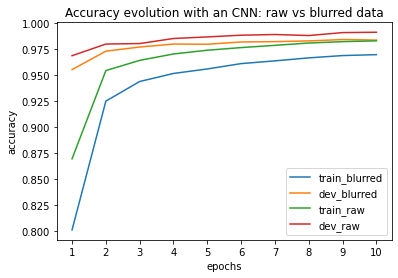

In [26]:
epochs = [i for i in range(1,11)]
epochs_ticks = [i for i in range(1,11)]
# Accuracy
fig1, ax1 = plt.subplots()
ax1.set_xticks(epochs_ticks)
plt.plot(epochs, history_cnn_blurred.history["accuracy"])
plt.plot(epochs, history_cnn_blurred.history["val_accuracy"])
plt.plot(epochs, history_cnn_raw.history["accuracy"])
plt.plot(epochs, history_cnn_raw.history["val_accuracy"])

plt.title("Accuracy evolution with an CNN: raw vs blurred data")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train_blurred", "dev_blurred", "train_raw", "dev_raw"], loc = "lower right")
plt.show()